In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Load the SynthLabsAI/Big-Math-RL-Verified dataset
print("Loading SynthLabsAI/Big-Math-RL-Verified dataset...")
dataset = load_dataset("SynthLabsAI/Big-Math-RL-Verified", token=os.environ["HUGGINGFACE_TOKEN"])

# Display basic information about the dataset
print(f"Dataset structure: {dataset}")
print(f"Available splits: {dataset.keys()}")

# Show a sample from the dataset
if "train" in dataset:
    print("\nSample from training set:")
    print(dataset["train"][0])
    print(f"Number of examples in training set: {len(dataset['train'])}")

if "test" in dataset:
    print("\nSample from test set:")
    print(dataset["test"][0])
    print(f"Number of examples in test set: {len(dataset['test'])}")

# Basic statistics about the dataset
print("\nExploring dataset fields and structure...")
if "train" in dataset:
    # Get column names
    columns = dataset["train"].column_names
    print(f"Dataset columns: {columns}")
    
    # Display a few examples in a DataFrame for better visualization
    df_sample = pd.DataFrame(dataset["train"][:5])
    print("\nSample data as DataFrame:")
    print(df_sample)

df = pd.DataFrame(dataset["train"])

Loading SynthLabsAI/Big-Math-RL-Verified dataset...
Dataset structure: DatasetDict({
    train: Dataset({
        features: ['problem', 'answer', 'source', 'domain', 'llama8b_solve_rate'],
        num_rows: 251122
    })
})
Available splits: dict_keys(['train'])

Sample from training set:
{'problem': 'Given $p$: $|4x-3|\\leqslant 1$ and $q$: $x^{2}-(2a+1)x+a^{2}+a\\leqslant 0$, find the range of values for $a$ if $p$ is a necessary but not sufficient condition for $q$.', 'answer': '[0, \\\\frac{1}{2}]', 'source': 'cn_k12', 'domain': ['Mathematics -> Algebra -> Equations and Inequalities -> Other'], 'llama8b_solve_rate': 0.125}
Number of examples in training set: 251122

Exploring dataset fields and structure...
Dataset columns: ['problem', 'answer', 'source', 'domain', 'llama8b_solve_rate']

Sample data as DataFrame:
                                             problem             answer  \
0  Given $p$: $|4x-3|\leqslant 1$ and $q$: $x^{2}...  [0, \\frac{1}{2}]   
1  In acute triangle 

In [14]:
df.head()

,problem,answer,source,domain,llama8b_solve_rate
0,Given $p$: $|4x-3|\leqslant 1$ and $q$: $x^{2}...,"[0, \\frac{1}{2}]",cn_k12,[Mathematics -> Algebra -> Equations and Inequ...,0.125000
1,"In acute triangle $\triangle ABC$, the sides o...",\\sqrt{21},cn_k12,[Mathematics -> Geometry -> Plane Geometry -> ...,0.359375
2,"If the linear function is $y=2x-3$, and it is ...",y = 2x,cn_k12,[Mathematics -> Algebra -> Algebraic Expressio...,0.531250
3,The sum of the first three terms of a geometri...,-2 \\text{ or } 1,cn_k12,[Mathematics -> Algebra -> Sequences and Series],0.781250
4,"If point $P(a, b)$ is on the graph of the func...",2\\sqrt{2},cn_k12,[Mathematics -> Calculus -> Applications of De...,0.000000


In [142]:
from IPython.display import display, Math, Markdown

# Randomly sample a problem from the dataframe
problem = df.sample(1).iloc[0]

print("source: ", problem["source"])
print("domain: ", problem["domain"])

print("problem:")
display(Markdown(problem["problem"]))
print("answer:")
display(Math(problem["answer"]))

source:  big_math
domain:  ['Mathematics -> Algebra -> Sequences and Series']
problem:


The sequence \(\{a_{n}\}\) satisfies \(a_{1}=3\) and \(a_{n+1}=-\frac{1}{a_{n}+1}\). Calculate the value of \(a_{2008}\). Express your answer as a single number.

answer:


<IPython.core.display.Math object>

In [161]:
from math_verify import parse, verify

answer = parse("<think>\n1. First, let's calculate the total number of apples Uncle Franky has. Since each box has 40 apples, two boxes would have 2 * 40 = 80 apples.\n2. Now we know Uncle Franky has 80 apples.\n3. Since he is planning to pack the apples with 8 apples in one pack, we can calculate the number of packs he can make by dividing the total number of apples by the number of apples per pack.\n4. 80 / 8 = 10\n</think>\n\nThe answer is 10.")
gold = parse("\\boxed{10}")
print(verify(answer, gold))

answer = parse("<think>\n1. First, let's calculate the total number of apples Uncle Franky has. Since each box has 40 apples, two boxes would have 2 * 40 = 80 apples.\n2. Now we know Uncle Franky has 80 apples.\n3. Since he is planning to pack the apples with 8 apples in one pack, we can calculate the number of packs he can make by dividing the total number of apples by the number of apples per pack.\n4. 80 / 8 = 10\n</think>\n\n10 is the answer.")
gold = parse("\\boxed{10}")
print(verify(answer, gold))

answer = parse("<think>\n1. First, let's calculate the total number of apples Uncle Franky has. Since each box has 40 apples, two boxes would have 2 * 40 = 80 apples.\n2. Now we know Uncle Franky has 80 apples.\n3. Since he is planning to pack the apples with 8 apples in one pack, we can calculate the number of packs he can make by dividing the total number of apples by the number of apples per pack.\n4. 80 / 8 = 10\n</think>")
gold = parse("\\boxed{10}")
print(verify(answer, gold))

answer = parse("<think>\n1. First, let's calculate the total number of apples Uncle Franky has. Since each box has 40 apples, two boxes would have 2 * 40 = 80 apples.\n2. Now we know Uncle Franky has 80 apples.\n3. Since he is planning to pack the apples with 8 apples in one pack, we can calculate the number of packs he can make by dividing the total number of apples by the number of apples per pack.\n4. 80 / 8 = ten\n</think>")
gold = parse("\\boxed{10}")
print(verify(answer, gold))

answer = parse("<think>\n1. First, let's calculate the total number of apples Uncle Franky has. Since each box has 40 apples, two boxes would have 2 * 40 = 80 apples.\n2. Now we know Uncle Franky has 80 apples.\n3. Since he is planning to pack the apples with 8 apples in one pack, we can calculate the number of packs he can make by dividing the total number of apples by the number of apples per pack.\n4. 80 / 8 = 10\n</think> The answer is ten")
gold = parse("\\boxed{10}")
print(verify(answer, gold))

answer = parse("<think>\n1. First, let's calculate the total number of apples Uncle Franky has. Since each box has 40 apples, two boxes would have 2 * 40 = 80 apples.\n2. Now we know Uncle Franky has 80 apples.\n3. Since he is planning to pack the apples with 8 apples in one pack, we can calculate the number of packs he can make by dividing the total number of apples by the number of apples per pack.\n4. 80 / 8 = 10\n</think> The answer is 10")
gold = parse("ten")
print(verify(answer, gold))

answer = parse("<think>\n1. First, let's calculate the total number of apples Uncle Franky has. Since each box has 40 apples, two boxes would have 2 * 40 = 80 apples.\n2. Now we know Uncle Franky has 80 apples.\n3. Since he is planning to pack the apples with 8 apples in one pack, we can calculate the number of packs he can make by dividing the total number of apples by the number of apples per pack.\n4. 80 / 8 = 10\n</think> The answer is ten")
gold = parse("ten")
print(verify(answer, gold))


answer = parse("<think>\n1. First, let's calculate the total number of apples Uncle Franky has. Since each box has 40 apples, two boxes would have 2 * 40 = 80 apples.\n2. Now we know Uncle Franky has 80 apples.\n3. Since he is planning to pack the apples with 8 apples in one pack, we can calculate the number of packs he can make by dividing the total number of apples by the number of apples per pack.\n4. 80 / 8 = ...\n</think><answer>ten</answer>")
gold = parse("\\boxed{10}")
print(verify(answer, gold))

answer = parse("<think>\n1. First, let's calculate the total number of apples Uncle Franky has. Since each box has 40 apples, two boxes would have 2 * 40 = 80 apples.\n2. Now we know Uncle Franky has 80 apples.\n3. Since he is planning to pack the apples with 8 apples in one pack, we can calculate the number of packs he can make by dividing the total number of apples by the number of apples per pack.\n4. 80 / 8 = 11\n</think><answer>10</answer>")
gold = parse("\\boxed{10}")
print(verify(answer, gold))

True
True
True
False
True
False
False
False
False


In [170]:
def extract_xml_answer(text: str) -> str:
    answer = text.split("<answer>")[-1]
    answer = answer.split("</answer>")[0]
    return answer.strip()

def correctness_reward_func(prompts, completions, answer, **kwargs) -> list[float]:
    responses = [completion[0]['content'] for completion in completions]
    q = prompts[0][-1]['content']
    extracted_responses = [extract_xml_answer(r) for r in responses]
    # print('-'*20, f"Question:\n{q}", f"\nAnswer:\n{answer[0]}", f"\nResponse:\n{responses[0]}", f"\nExtracted:\n{extracted_responses[0]}")
    return [2.0 if verify(parse(r), parse(a)) else 0.0 for r, a in zip(extracted_responses, answer)]

# Test cases for correctness_reward_func
def test_correctness_reward_func():
    # Test case 1: Correct answer
    prompts = [[{'role': 'user', 'content': 'How many apples does Uncle Franky have?'}]]
    completions = [[{'content': '<reasoning>\nUncle Franky has 2 boxes with 40 apples each.\n2 * 40 = 80 apples\n</reasoning>\n<answer>\n80\n</answer>'}]]
    answer = ['80']
    rewards = correctness_reward_func(prompts, completions, answer)
    assert rewards[0] == 2.0, f"Test 1 failed: Expected 2.0, Got {rewards[0]}"
    
    # Test case 2: Incorrect answer
    completions = [[{'content': '<reasoning>\nUncle Franky has 2 boxes with 40 apples each.\n2 * 40 = 90 apples\n</reasoning>\n<answer>\n90\n</answer>'}]]
    rewards = correctness_reward_func(prompts, completions, answer)
    assert rewards[0] == 0.0, f"Test 2 failed: Expected 0.0, Got {rewards[0]}"
    
    # Test case 3: Correct answer with different format (text vs number)
    completions = [[{'content': '<reasoning>\nUncle Franky has 2 boxes with 40 apples each.\n2 * 40 = 80 apples\n</reasoning>\n<answer>\\boxed{80}\n</answer>'}]]
    rewards = correctness_reward_func(prompts, completions, ['80'])
    assert rewards[0] == 2.0, f"Test 3 failed: Expected 2.0, Got {rewards[0]}"
    
    # Test case 4: Malformed XML but correct answer
    completions = [[{'content': '<reasoning>\nUncle Franky has 2 boxes with 40 apples each.\n2 * 40 = 80 apples\n</reasoning>\nThe answer is 80'}]]
    rewards = correctness_reward_func(prompts, completions, answer)
    assert rewards[0] == 2.0, f"Test 4 failed: Expected 0.0, Got {rewards[0]}"

    # Test case 5: Multiple completions and answers
    prompts = [[{'role': 'user', 'content': 'Solve the equation: 2x + 3 = 7'}]]
    completions = [
        [{'content': '<reasoning>\n2x + 3 = 7\n2x = 7 - 3\n2x = 4\nx = 4/2\nx = 2\n</reasoning>\n<answer>\n2\n</answer>'}],
        [{'content': '<reasoning>\n2x + 3 = 7\n2x = 4\nx = 4\n</reasoning>\n<answer>\n4\n</answer>'}]
    ]
    answer = ['2', '4']
    rewards = correctness_reward_func(prompts, completions, answer)
    assert rewards[0] == 2.0 and rewards[1] == 2.0, f"Test 5 failed: Expected [2.0, 2.0], Got {rewards}"
    
    # Test case 6: Fractions
    prompts = [[{'role': 'user', 'content': 'What is 1/4 + 1/2?'}]]
    completions = [[{'content': '<reasoning>\n1/4 + 1/2 = 1/4 + 2/4 = 3/4\n</reasoning>\n<answer>\n\\frac{3}{4}\n</answer>'}]]
    answer = ['\\frac{3}{4}']
    rewards = correctness_reward_func(prompts, completions, answer)
    assert rewards[0] == 2.0, f"Test 6 failed: Expected 2.0, Got {rewards[0]}"
    
    # Test case 7: LaTeX expressions
    prompts = [[{'role': 'user', 'content': 'What is the area of a circle with radius 2?'}]]
    completions = [[{'content': '<reasoning>\nThe area of a circle is given by the formula A = πr²\nWith radius r = 2, we have:\nA = π × 2² = π × 4 = 4π\n</reasoning>\n<answer>\n4\\pi\n</answer>'}]]
    answer = ['4*\\pi']
    rewards = correctness_reward_func(prompts, completions, answer)
    assert rewards[0] == 2.0, f"Test 7 failed: Expected 2.0, Got {rewards[0]}"
    
    # Test case 8: Multiple correct answers (equivalent expressions)
    prompts = [[{'role': 'user', 'content': 'Simplify √8'}]]
    completions = [[{'content': '<reasoning>\n√8 = √(4 × 2) = √4 × √2 = 2√2\n</reasoning>\n<answer>\n2*\\sqrt{2}\n</answer>'}]]
    answer = ['2\\sqrt{2}']
    rewards = correctness_reward_func(prompts, completions, answer)
    assert rewards[0] == 2.0, f"Test 8 failed: Expected 2.0, Got {rewards[0]}"
    
    # Test case 9: Complex LaTeX with mixed formats
    prompts = [[{'role': 'user', 'content': 'Solve the quadratic equation x² - 5x + 6 = 0'}]]
    completions = [
        [{'content': '<reasoning>\nx² - 5x + 6 = 0\nWe can factor this as (x-2)(x-3) = 0\nSo x = 2 or x = 3\n</reasoning>\n<answer>\nx = 2, x = 3\n</answer>'}],
        [{'content': '<reasoning>\nx² - 5x + 6 = 0\nUsing the quadratic formula: x = (-b ± √(b² - 4ac))/(2a)\nWith a=1, b=-5, c=6\nx = (5 ± √(25 - 24))/2\nx = (5 ± √1)/2\nx = (5 ± 1)/2\nx = 3 or x = 2\n</reasoning>\n<answer>\n\\{2, 3\\}\n</answer>'}]
    ]
    answer = ['x = 2, x = 3', '\\{2, 3\\}']
    rewards = correctness_reward_func(prompts, completions, answer)
    assert rewards[0] == 2.0 and rewards[1] == 2.0, f"Test 9 failed: Expected [2.0, 2.0], Got {rewards}"

# Run the tests
print("Running tests for correctness_reward_func:")
test_correctness_reward_func()


Running tests for correctness_reward_func:


None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


Maximum token count: 1256
Problem with maximum tokens:

Let \(A\) and \(E\) be the centers of circles \(\omega_{1}\) and \(\omega_{2}\) with radii \(r\) and \(R\), respectively, where \(r < R\). According to the problem, \(A \in \omega_{2}\), and \(B\) and \(C\) are the intersection points of these circles. Note that their common chord \(BC\) is perpendicular to the segment \(AE\). We have:
\[ AB = AC = r, \quad EB = EC = EA = R. \]
Denote \(\angle BAE = \angle CAE = \alpha\) and \(\angle BEA = \angle CEA = \gamma\).

Write the formula for calculating the area of the union of the disks \(\Omega_{1}\) and \(\Omega_{2}\) enclosed by circles \(\omega_{1}\) and \(\omega_{2}\):
\[ S_{\Omega_{1} \cup \Omega_{2}} = S_{\Omega_{1}} + S_{\Omega_{2}} - S_{\Omega_{1} \cap \Omega_{2}}, \]
where \(S_{\Omega_{1}} = \pi r^{2}\) and \(S_{\Omega_{2}} = \pi R^{2}\), the areas of the disks \(\Omega_{1}\) and \(\Omega_{2}\), and \(S_{\Omega_{1} \cap \Omega_{2}}\) is the area of their intersection.

Find \(

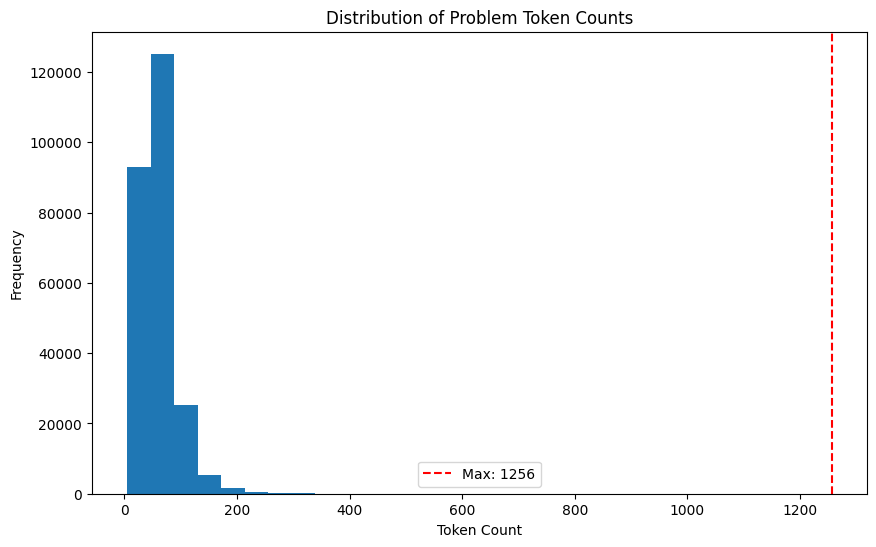

In [172]:
# Check the maximum length of any problem in the dataset
import pandas as pd
from transformers import AutoTokenizer

# Load the tokenizer that will be used for the model
tokenizer = AutoTokenizer.from_pretrained("meta-llama/meta-Llama-3.1-8B-Instruct")

# Function to get token count
def get_token_count(text):
    return len(tokenizer.encode(text))

# Get token counts for all problems
df['token_count'] = df['problem'].apply(get_token_count)

# Find the maximum token count
max_tokens = df['token_count'].max()
max_problem = df.loc[df['token_count'].idxmax(), 'problem']

print(f"Maximum token count: {max_tokens}")
print(f"Problem with maximum tokens:\n{max_problem}")

# Display histogram of token counts
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['token_count'], bins=30)
plt.title('Distribution of Problem Token Counts')
plt.xlabel('Token Count')
plt.ylabel('Frequency')
plt.axvline(x=max_tokens, color='r', linestyle='--', label=f'Max: {max_tokens}')
plt.legend()
plt.show()
